<a href="https://colab.research.google.com/github/Yewon-dev/DeepLearning-Edu/blob/main/0331_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, LSTM, Activation, Input, RNN , LeakyReLU
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy, mse
from keras.metrics import MeanSquaredError

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
# 1. 데이터 셋 정리
df1 = pd.read_csv('sample_data/test_data1.csv', encoding='cp949')
df2 = pd.read_csv('sample_data/test_data2.csv', encoding='cp949')

In [88]:
df1.head()

,comp_name,date,year,month,day,hour,max_temp,max_windspeed,min_humid,air,cloud,sunshine,g_temp,temp,wind_velocity,humidity,PV
0,대한정밀공업,2020-10-20,2020,10,20,0,11.6,35.70,79.0,1689.0,0.0,0.0,12.3,11.2,0.4,89.0,0.0
1,대한정밀공업,2020-10-20,2020,10,20,1,11.2,33.85,82.8,1509.0,0.0,0.0,11.8,10.9,0.4,92.0,0.0
2,대한정밀공업,2020-10-20,2020,10,20,2,10.9,35.70,85.1,1611.0,0.0,0.0,11.3,10.4,0.1,95.0,0.0
3,대한정밀공업,2020-10-20,2020,10,20,3,10.6,32.02,86.3,1347.0,0.0,0.0,10.9,9.8,0.4,97.0,0.0
4,대한정밀공업,2020-10-20,2020,10,20,4,10.3,35.71,87.1,1329.0,0.0,0.0,10.6,9.7,0.2,97.0,0.0


In [89]:
# 1-1. 데이터 두개 합치기
df = pd.concat([df1, df2])

In [90]:
# 인덱스 재설정
df.reset_index(inplace=True)
# df.set_index(np.arange(df.shape[0]), inplace=True)

In [91]:
df

,index,comp_name,date,year,month,day,hour,max_temp,max_windspeed,min_humid,air,cloud,sunshine,g_temp,temp,wind_velocity,humidity,PV
0,0,대한정밀공업,2020-10-20,2020,10,20,0,11.6,35.70,79.0,1689.0,0.0,0.0,12.3,11.2,0.4,89.0,0.000000
1,1,대한정밀공업,2020-10-20,2020,10,20,1,11.2,33.85,82.8,1509.0,0.0,0.0,11.8,10.9,0.4,92.0,0.000000
2,2,대한정밀공업,2020-10-20,2020,10,20,2,10.9,35.70,85.1,1611.0,0.0,0.0,11.3,10.4,0.1,95.0,0.000000
3,3,대한정밀공업,2020-10-20,2020,10,20,3,10.6,32.02,86.3,1347.0,0.0,0.0,10.9,9.8,0.4,97.0,0.000000
4,4,대한정밀공업,2020-10-20,2020,10,20,4,10.3,35.71,87.1,1329.0,0.0,0.0,10.6,9.7,0.2,97.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,231,대한정밀공업,2020-12-04,2020,12,4,14,10.5,27.69,19.0,1182.0,5.0,1.0,12.8,9.3,27.0,25.0,110.300000
784,232,대한정밀공업,2020-12-04,2020,12,4,15,10.3,33.42,14.3,955.0,8.0,1.0,9.8,9.1,32.0,24.0,53.613734
785,233,대한정밀공업,2020-12-04,2020,12,4,16,8.9,35.37,15.8,942.0,5.0,0.8,7.5,9.0,32.0,24.0,14.844709
786,234,대한정밀공업,2020-12-04,2020,12,4,17,7.3,35.71,17.4,1106.0,8.0,0.3,5.1,8.3,29.0,24.0,0.399298


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          788 non-null    int64  
 1   comp_name      788 non-null    object 
 2   date           788 non-null    object 
 3   year           788 non-null    int64  
 4   month          788 non-null    int64  
 5   day            788 non-null    int64  
 6   hour           788 non-null    int64  
 7   max_temp       788 non-null    float64
 8   max_windspeed  788 non-null    float64
 9   min_humid      788 non-null    float64
 10  air            788 non-null    float64
 11  cloud          788 non-null    float64
 12  sunshine       788 non-null    float64
 13  g_temp         788 non-null    float64
 14  temp           788 non-null    float64
 15  wind_velocity  788 non-null    float64
 16  humidity       788 non-null    float64
 17  PV             788 non-null    float64
dtypes: float64

In [93]:
# 1-2. 중복되는 행 지우기
# duplicated: 중복되는 변수가 있으면 true, 없으면 false
# df[df.duplicated(['date','hour'])].index
# == 683
df.drop(683, axis=0, inplace=True)

In [94]:
# 1-3. tidy 데이터 만들기
# index = 날짜, column = 시간, value = PV
X = df.pivot(index='date', columns='hour', values='PV')[:-1]
y = df.pivot(index='date', columns='hour', values='PV')[1:]

In [95]:
X

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-20,0.0,0.0,0.0,0.0,0.0,0.0,1.1,30.4,85.100000,130.700000,161.800000,177.600000,179.000000,152.400000,122.000000,88.200000,30.600000,3.500000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-23,0.0,0.0,0.0,0.0,0.0,0.0,0.8,32.5,94.900000,148.600000,183.000000,201.800000,200.900000,184.700000,153.800000,105.900000,30.400000,2.200000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-26,0.0,0.0,0.0,0.0,0.0,0.0,0.7,28.4,86.900000,133.002531,163.197469,179.000000,180.200000,170.400000,133.500000,89.600000,25.700000,1.400000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.7,25.1,74.000000,120.000000,149.500000,162.000000,168.800000,152.170929,122.729071,77.600000,22.700000,1.543277,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.207852,50.032189,85.459959,47.200000,132.100000,154.100000,117.100000,78.800000,21.900000,1.250484,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.6,23.7,76.400000,124.800000,159.500000,178.600000,174.700000,156.300000,123.500000,65.800000,24.600000,1.841966,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-30,0.0,0.0,0.0,0.0,0.0,0.0,0.4,24.9,78.400000,128.400000,162.200000,178.600000,181.100000,167.900000,134.600000,84.600000,22.900000,1.900037,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.8,23.3,73.400000,129.200000,159.100000,174.400000,177.400000,157.560005,136.639995,73.900000,20.300000,1.901312,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-11-03,0.0,0.0,0.0,0.0,0.0,0.0,0.3,23.0,72.700000,134.800000,175.000000,194.500000,195.100000,176.800000,144.300000,91.000000,22.000000,1.600000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [96]:
y

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-23,0.0,0.0,0.0,0.0,0.0,0.0,0.8,32.5,94.900000,148.600000,183.000000,201.800000,200.900000,184.700000,153.800000,105.900000,30.400000,2.200000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-26,0.0,0.0,0.0,0.0,0.0,0.0,0.7,28.4,86.900000,133.002531,163.197469,179.000000,180.200000,170.400000,133.500000,89.600000,25.700000,1.400000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.7,25.1,74.000000,120.000000,149.500000,162.000000,168.800000,152.170929,122.729071,77.600000,22.700000,1.543277,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.207852,50.032189,85.459959,47.200000,132.100000,154.100000,117.100000,78.800000,21.900000,1.250484,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.6,23.7,76.400000,124.800000,159.500000,178.600000,174.700000,156.300000,123.500000,65.800000,24.600000,1.841966,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-30,0.0,0.0,0.0,0.0,0.0,0.0,0.4,24.9,78.400000,128.400000,162.200000,178.600000,181.100000,167.900000,134.600000,84.600000,22.900000,1.900037,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.8,23.3,73.400000,129.200000,159.100000,174.400000,177.400000,157.560005,136.639995,73.900000,20.300000,1.901312,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-11-03,0.0,0.0,0.0,0.0,0.0,0.0,0.3,23.0,72.700000,134.800000,175.000000,194.500000,195.100000,176.800000,144.300000,91.000000,22.000000,1.600000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2020-11-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.247344,163.732597,170.720058,190.600000,194.400000,178.600000,146.700000,94.500000,20.400000,1.200000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [97]:
X = X.values.reshape(32,24,1)
y.fillna(0,inplace=True)

In [101]:
# 2. Model Build
model = Sequential()
model.add(LSTM(100,input_shape=(24,1)))
model.add(BatchNormalization())
model.add(Dense(256,activation='tanh'))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.4))
model.add(Dense(24)) # y개수로 출력

In [102]:
# 3. Model compile
model.compile(loss='mse', optimizer='rmsprop' 
              , metrics=['MeanSquaredError'])

In [ ]:
from keras import metrics
dir(metrics)

In [103]:
# 4. 모델 학습
model.fit(X, y, batch_size=1, epochs= 500)

Epoch 1/500
32/32 [==============================] - 2s 6ms/step - loss: 4797.6834 - mean_squared_error: 4797.6834
Epoch 2/500
32/32 [==============================] - 0s 6ms/step - loss: 783.3020 - mean_squared_error: 783.3020
Epoch 3/500
32/32 [==============================] - 0s 7ms/step - loss: 487.3652 - mean_squared_error: 487.3652
Epoch 4/500
32/32 [==============================] - 0s 6ms/step - loss: 471.4971 - mean_squared_error: 471.4971
Epoch 5/500
32/32 [==============================] - 0s 7ms/step - loss: 736.1993 - mean_squared_error: 736.1993
Epoch 6/500
32/32 [==============================] - 0s 6ms/step - loss: 366.4309 - mean_squared_error: 366.4309
Epoch 7/500
32/32 [==============================] - 0s 6ms/step - loss: 669.7423 - mean_squared_error: 669.7423
Epoch 8/500
32/32 [==============================] - 0s 6ms/step - loss: 311.7299 - mean_squared_error: 311.7299
Epoch 9/500
32/32 [==============================] - 0s 6ms/step - loss: 368.7552 - mean_squar

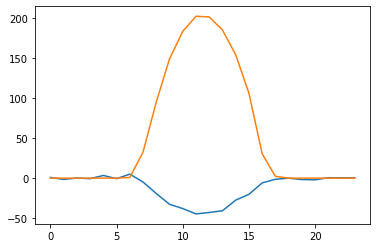

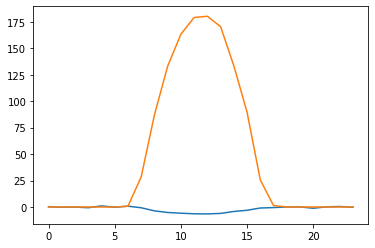

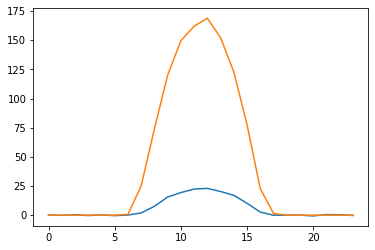

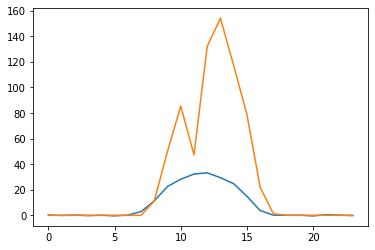

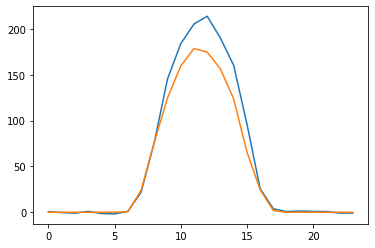

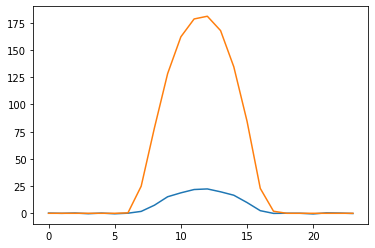

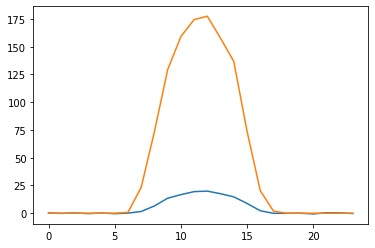

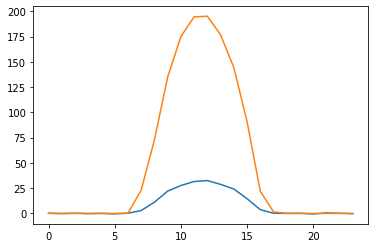

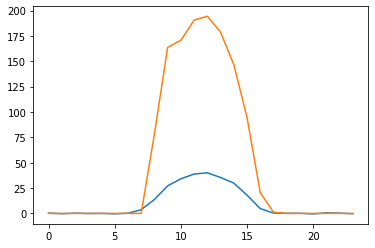

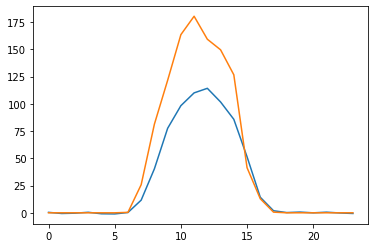

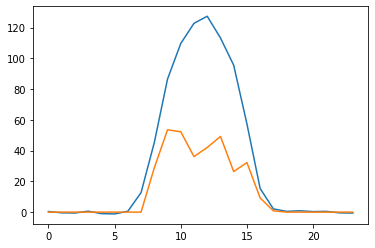

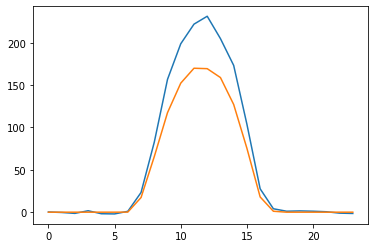

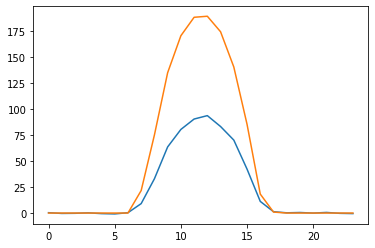

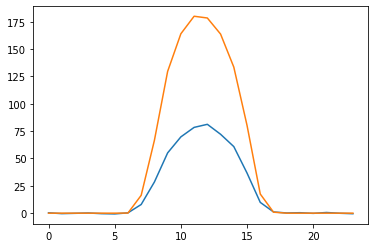

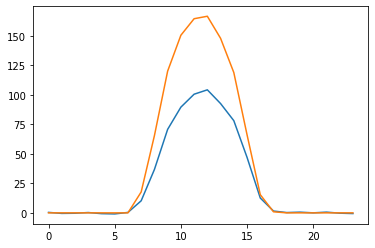

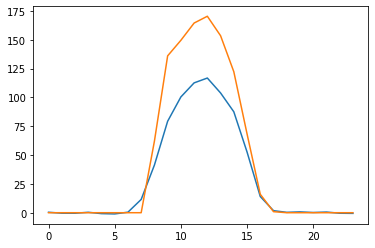

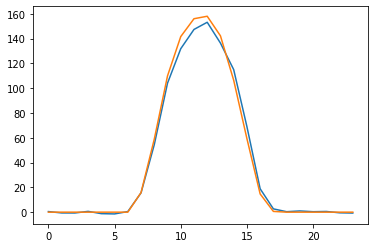

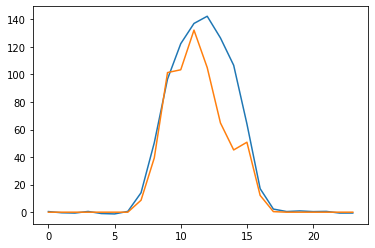

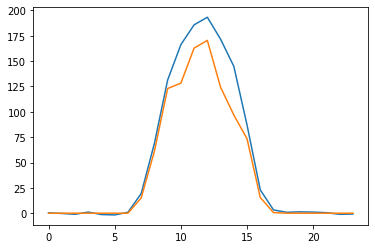

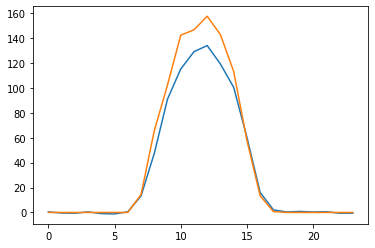

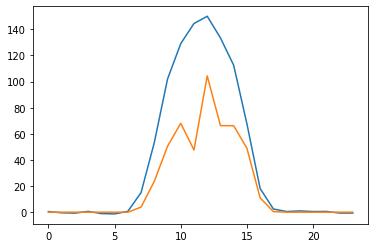

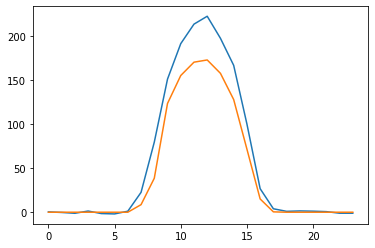

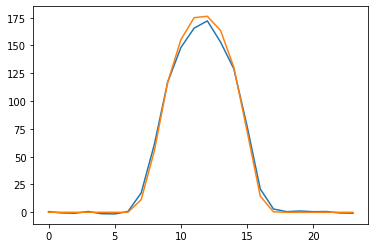

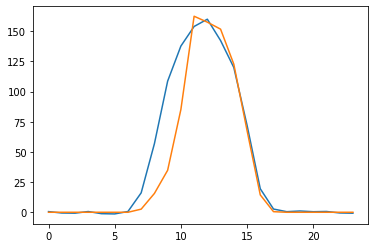

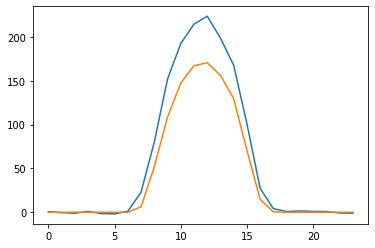

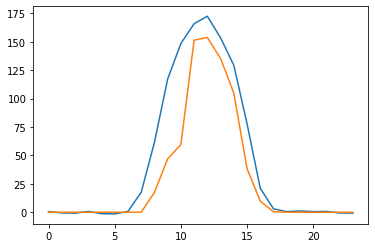

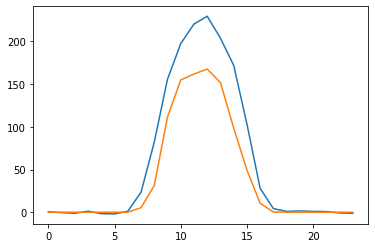

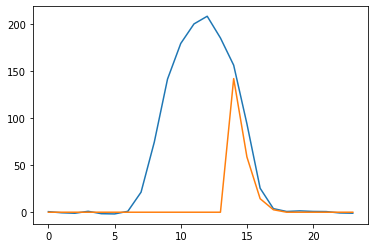

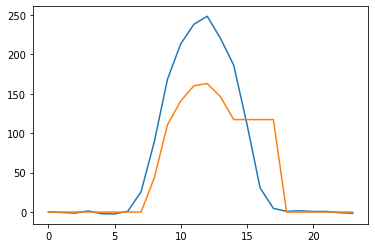

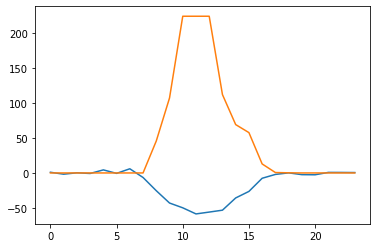

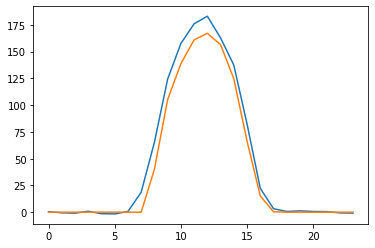

In [104]:
# 5. 모델 확인
for i in range(31):
  x = range(24)
  y = model.predict(X[i].reshape(1,24,1)).reshape(24,)
  plt.plot(x, y)
  plt.plot(x,X[i+1].reshape(24,))
  plt.show()


In [2]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))

In [3]:
model.summary() ## weight:3, bias:3 == param :6

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(LSTM(3, input_dim=1, activation='tanh'))

In [5]:
model.summary() ## 메모리 셀에 있는 노드의 갯수가 60개 == 조금만 늘려도 엄청 늘어남 == 제일 느림

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3)                 60        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [8]:
inputs = Input((1,2))
out, hidden, cell = LSTM(3, return_state=True)(inputs) # return_state=True?
model = Model(inputs=inputs, outputs=[out, hidden, cell])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm_1 (LSTM)                [(None, 3), (None, 3), (N 72        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [10]:
out, hidden, cell = model.predict([[[1,0]]])

In [11]:
print(out, hidden, cell)

[[ 0.05601168 -0.11398652 -0.09413266]] [[ 0.05601168 -0.11398652 -0.09413266]] [[ 0.09144436 -0.1945343  -0.1581134 ]]
